### ASTR 3400: Research Methods
## Lecture Notes: Least-squares Fitting
*Prof. Paul Hayne - CU Boulder / LASP*

In [75]:
###########
# Imports #
###########
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
#

###############
# Plot params #
###############
#
# Set vector plotting by default
#%config InlineBackend.figure_formats = ['svg']
# Make fonts bigger
font = {'family' : 'sans',
        'size'   : 12}
rc('font', **font)
# Set color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler( color=['CC6677', '332288', 'DDCC77', '117733', \
                                                     '88CCEE', '882255', '44AA99', '999933', \
                                                     'AA4499', 'DDDDDD'])
#

So far, we have developed several statistical metrics for estimating uncertainties:

* **Standard deviation**, or "standard error" of a collection of measurements
* **Error in the mean**, which is the uncertainty on the average value of a set of measurements
* **Root-mean-square (RMS)** deviation, which is a measure of the error in a model compared to the measurements

Model-fitting is the practice of minimizing the discrepancy between a model and the data. We have already worked through examples of simple approaches, based on the RMS error. More generally, this is a type of "least-squares minimization." Here, we will walk through the basic ideas and present some practical examples.

### Linear Systems

In many physical systems, an observable quantity, $y$, can be expressed as a linear combination of a finite set of functions of an independent variable, $x$. A very simple example is a mass on a spring, where we measure the force for a given displacement:

\begin{align}
    y(x) = F(x) = k x
\end{align}

In this example, the free parameter we wish to fit is $k$, and there is only one variable, $x$.

More generally, a set of measurements $\{y_i\} = \{y_1, y_2, ..., y_m\}$ are acquired at multiple discrete values of the independent variable, $\{x_i\} = \{x_1, x_2, ..., x_\mathrm{m}\}$, where $m$ is the number of independent measurements, and $y_i = y_i(x_i)$. Assuming the observed quantities can be expressed as linear combinations of functions of the variables $x_i$,

\begin{align}
    y_1 &= \beta_1 f_1(x_1) + \beta_2 f_2(x_1) + ... + \beta_\mathrm{n} f_\mathrm{n}(x_1)\\
    y_2 &= \beta_1 f_1(x_2) + \beta_2 f_2(x_2) + ... + \beta_\mathrm{n} f_\mathrm{n}(x_2)\\
    &...\\
    y_\mathrm{m} &= \beta_1 f_1(x_\mathrm{m}) + \beta_2 f_2(x_\mathrm{m}) + ... + \beta_\mathrm{n} f_\mathrm{n}(x_m)\\
\end{align}

Or, $y_i = \Sigma_j \beta_j f_j(x_i)$. We can write this in matrix notation, defining a matrix $\mathbf{F}$ with elements $F_{ij} = f_j(x_i)$:

\begin{align}
    \mathbf{y} = \mathbf{F} \mathbf{\beta}
\end{align}

The parameters we seek are the values in $\mathbf{\beta} = \{\beta_1, \beta_2, ..., \beta_n\}$. If the matrix has an *inverse*, $\mathbf{F}^{-1}$, then we can solve the equation exactly: $\mathbf{\beta} = \mathbf{F}^{-1} \mathbf{y}$. In practice, this happens rarely, and is only possible when the number of equations $m$ exactly equals the number of uknowns $n$. More likely, $m > n$, i.e. we have more equations than unknowns, and the system is *overdetermined*. For example, if we make many measurements of the applied force and resulting dislacement of a spring, we will have a large number $m$ and only one uknown (the spring constant, $k = \beta_1$), i.e. $n = 1$. In these cases, we use the method of **least squares minimization** to estimate the values $\{\beta_i\}$.

### Linear Least-squares Minimization

We make measurements of the outcomes of an experiment, which we call $y_i(x_i)$, where $x_i$ are different values of the *independent* variable (adjusted in the course of the experiment), with $i = 1, ..., m$.

Our model for the *dependent* variable (the outcome) can be written $y = f(x, \beta_1, \beta_2, ...)$, where the parameters $\beta_j$ ($j = 1, ..., n$) are unknowns to be estimated by our minimization procedure. Here, we are only considering *linear* systems, where the function $f$ can be written $f(x, \beta_1, \beta_2, ...) = \beta_1 f_1(x) + \beta_2 f_2(x) + ... + \beta_n f_n (x)$ .

The *residuals* are the differences between the measurements and the modeled values:

\begin{align}
    R_i = y_i - \sum_{j=1}^{n} \beta_j f_j(x_i)
\end{align}

We want to ignore the signs of the differences, and therefore we attempt to minimize the sum of the squares of the residuals:

\begin{align}
    S = \sum_{i=1}^{m} R_i^2
\end{align}

Minimizing $S$ thus requires:

\begin{align}
    \frac{\partial S}{\partial \beta_j} &= \frac{\partial}{\partial \beta_j}\left[ \sum_{i=1}^n R_i^2 \right]\\
    &= 2\sum_{i=1}^m R_i\frac{\partial R_i}{\partial \beta_j} \\
    &\rightarrow \sum_{i=1}^m \left[ y_i - \sum_{j=1}^n \beta_j f_j(x_i)\right] f_j(x_i) = 0
\end{align}

Least-squares minimization algorithms find the value of $\beta_j$ corresponding to the root of this equation; this is the value of the parameter that minimizes the square residual. Looping over the index $j$ provides best-fit estimates of each of the unknown parameters.

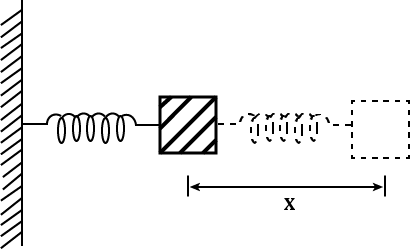

In [76]:
from IPython import display
spring_image = '/Users/paha3326/main/Teaching/ASTR3400/hayne/S23/practice/mass-spring.png'
display.Image(spring_image)

#### A simple example: Hooke's law

Returning to our very simple example of the mass on a spring with unknown spring constant $k$, we can write the measured forces as $y_i(x_i)$, where $x_i$ is the displacement for the $i^\mathrm{th}$ experiment. We have $n=1$ and $\beta_1 = k$. The model in this case is $y = kx$. Then the residuals from the $i^\mathrm{th}$ experiment are

\begin{align}
    R_i = y_i - kx_i
\end{align}

and the minimization formula looks like

\begin{align}
    \frac{\partial S}{\partial k} &= 2\sum_{i=1}^m (y_i - kx_i) \frac{\partial}{\partial k} \left( y_i - k x_i \right)\\
    &= 2\sum_{i=1}^m (k x_i^2 - y_i x_i) = 0\\
    &\rightarrow \hat{k} = \frac{\sum y_i x_i}{\sum x_i^2}
\end{align}

where $\hat{k}$ is the best-fit value of $k$. So, we see that in this very simple example, the least-squares minimization formula can be calculated in a very straightforward way from the measured forces $y_i$ and displacements $x_i$.

The best-fit value of the spring constant is k = 1.05 N/m
    ---> True value: 1.00 N/m


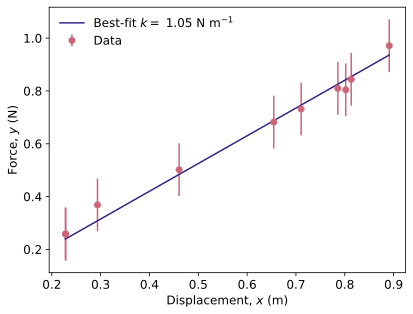

In [77]:
# -------------------
# Ex: Hooke's Law
# -------------------
k = 1.0 # spring constant [N.m-1]
m = 10 # number of measurements

# Displacement data
x = np.sort(np.random.rand(m))
yerr = 0.1 # error in force meas. [N]
y = k * x + np.random.rand(m)*yerr # measurements [N]

# Estimated spring constant
khat = np.sum( y * x )/np.sum( x**2 )
print('The best-fit value of the spring constant is k = {:.2f} N/m'.format(khat))
print('    ---> True value: {:.2f} N/m'.format(k))

# Plot
fig, ax = plt.subplots()
_ = ax.errorbar(x, y, yerr, marker='o', linestyle='', label='Data')
_ = ax.plot(x, khat*x, '-', label=r'Best-fit $k =$ %.2f $\mathrm{N~m^{-1}}$' %khat)
_ = ax.legend(frameon=False)
_ = ax.set_xlabel(r'Displacement, $x$ (m)')
_ = ax.set_ylabel(r'Force, $y$ (N)')

#### Least Squares: Implementation in Python

The two most common and versatile libraries for least-squares model fitting are `numpy` and `scipy`. In NumPy, the function `numpy.linalg.lstsq` provides a robust solver for many linear problems that can be written in the matrix form above. SciPy provides more extensive functionality with `scipy.optimize.least_squares`, which takes a function as an argument, rather than a matrix. In addition, SciPy's `scipy.optimize.nnls` provides a matrix solver that restricts the solution to non-negative values; this is valuable when considering a measured signal that is composed of a linear combination of sources, as in the spectroscopy example below.

#### Application: Spectral Un-mixing

Spectroscopy is one of the gold-standard tools of remote sensing. In principle, it is possible to infer the composition of surfaces and atmospheres of planetary bodies from a great distance, using only the reflected or emitted light. While observations are often complicated by nonlinear effects such as atmospheric scattering, sometimes it is reasonable to assume that the measured signal consists of a linear combination of sources. For example, imagine a surface (under a transparent atmosphere) composed of a "checkerboard" pattern of several different compositions (Figure).

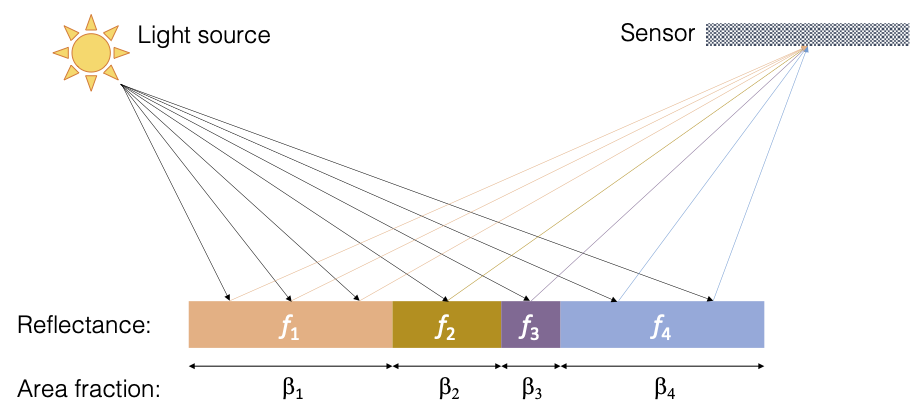

In [78]:
spectral_image = '/Users/paha3326/main/Teaching/ASTR3400/hayne/S23/practice/spectral_linear-mixing_schematic.png'
display.Image(spectral_image)

The measured signal at each wavelength $i$ is then a linear combination of the contributions of the components $f_j$,

\begin{align}
    \mathrm{(Measured~signal~at~wavelength}~ \lambda_i) = s_i(\lambda_i) &= \beta_1 f_1(\lambda_i) + \beta_2 f_2(\lambda_i) + ... + \beta_n f_n(\lambda_i)\\
    &= \sum_{j=1}^n \beta_j f_j(\lambda_i)
\end{align}

With measurements $s_i$ at multiple wavelengths $\lambda_i$ ($i=1, 2, ..., m$), we can write this as a standard linear least-squares problem using the framework above. Each derived parameter $\beta_j$ then gives the area fraction of the $j^\mathrm{th}$ component within the measurement footprint. This is described as the "abundance" of that compositional component. We typically prescribe the spectra $f_j(\lambda)$ for each of these candidate components. Their abundances can be zero, but they *cannot be less than zero* (i.e., there is no such thing as a negative abundance!). So, it's important to constrain the least-squares fitting routine to yield only positive solution parameters.

The mixing coefficients are as follows:
    spec1: 28.2%
    spec2: 14.1%
    spec3: 1.4%
    spec4: 56.3%


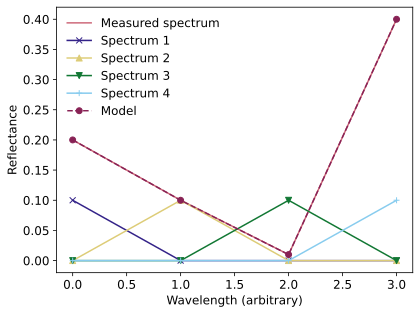

In [79]:
import scipy.optimize as opt
# -----------------------
# Ex: Spectral Un-mixing
# -----------------------
# In this example, the input spectra are linearly independent,
# and the number of samples (wavelengths) is equal to the number
# of input spectra, i.e. the unknowns. Thus, the matrix is
# invertible and the solution is exact (R = 0).

# Spectra of possible components
spec1 = np.array([0.1, 0.0, 0.0, 0.0]).T
spec2 = np.array([0.0, 0.1, 0.0, 0.0]).T
spec3 = np.array([0.0, 0.0, 0.1, 0.0]).T
spec4 = np.array([0.0, 0.0, 0.0, 0.1]).T

# Measured spectrum
spec_meas = np.array([0.2, 0.1, 0.01, 0.4])

# Matrix representation of basis vectors
F = np.stack( (spec1, spec2, spec3, spec4) ).T

# Solve using SciPy
beta, R = opt.nnls(F, spec_meas)

# Describe results
beta_sum = np.sum(beta)
print('The mixing coefficients are as follows:')
print('    spec1: {:.1f}%'.format(beta[0]*100/beta_sum))
print('    spec2: {:.1f}%'.format(beta[1]*100/beta_sum))
print('    spec3: {:.1f}%'.format(beta[2]*100/beta_sum))
print('    spec4: {:.1f}%'.format(beta[3]*100/beta_sum))

# Plot spectra
x = range(len(spec_meas))
fig_s, ax_s = plt.subplots()
ax_s.plot(x, spec_meas, '-', label='Measured spectrum')
ax_s.plot(x, spec1, 'x-', label='Spectrum 1')
ax_s.plot(x, spec2, '^-', label='Spectrum 2')
ax_s.plot(x, spec3, 'v-', label='Spectrum 3')
ax_s.plot(x, spec4, '+-', label='Spectrum 4')
ax_s.plot(x, np.matmul(F, beta), '--o', label='Model')
_ = ax_s.legend(frameon=False)
_ = ax_s.set_xlabel('Wavelength (arbitrary)')
_ = ax_s.set_ylabel('Reflectance')